In [1]:
# Import necessary libraries
import pandas as pd

In [4]:
# Load the dataset using full absolute path
df = pd.read_csv(r'C:\Users\rajat\Desktop\Rajat\Study\Project\Snowflake-Ecommerce-Analysis\data\data.csv', encoding='ISO-8859-1')

In [5]:
# Display basic info
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nFirst 5 rows:\n")
display(df.head())

Shape of dataset: (541909, 8)

Column names:
 Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

First 5 rows:



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [7]:
# Drop rows where 'Description' is missing
df = df[~df['Description'].isnull()]

In [8]:
# Fill missing 'CustomerID' with a placeholder (optional: depends on use case)
df['CustomerID'] = df['CustomerID'].fillna('Unknown')

In [9]:
# Confirm changes
print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [10]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [11]:
# Confirm the change
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object


In [12]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 5268


In [13]:
# Drop duplicates if any
df = df.drop_duplicates()

In [14]:
# Confirm removal
print("Number of duplicate rows after dropping:", df.duplicated().sum())

Number of duplicate rows after dropping: 0


In [15]:
# Extract year and month from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month_name()

In [16]:
# Create a new column for total sales per row
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [17]:
# Preview the updated DataFrame
df[['InvoiceDate', 'Year', 'Month', 'Quantity', 'UnitPrice', 'Sales']].head()

,InvoiceDate,Year,Month,Quantity,UnitPrice,Sales
0,2010-12-01 08:26:00,2010,December,6,2.55,15.30
1,2010-12-01 08:26:00,2010,December,6,3.39,20.34
2,2010-12-01 08:26:00,2010,December,8,2.75,22.00
3,2010-12-01 08:26:00,2010,December,6,3.39,20.34
4,2010-12-01 08:26:00,2010,December,6,3.39,20.34


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Set plot style
plt.style.use('ggplot')

In [20]:
# Count transactions per country
top_countries = df['Country'].value_counts().head(10)

Top 10 Countries by Number of Transactions

C:\Users\rajat\AppData\Local\Temp\ipykernel_10852\933012388.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


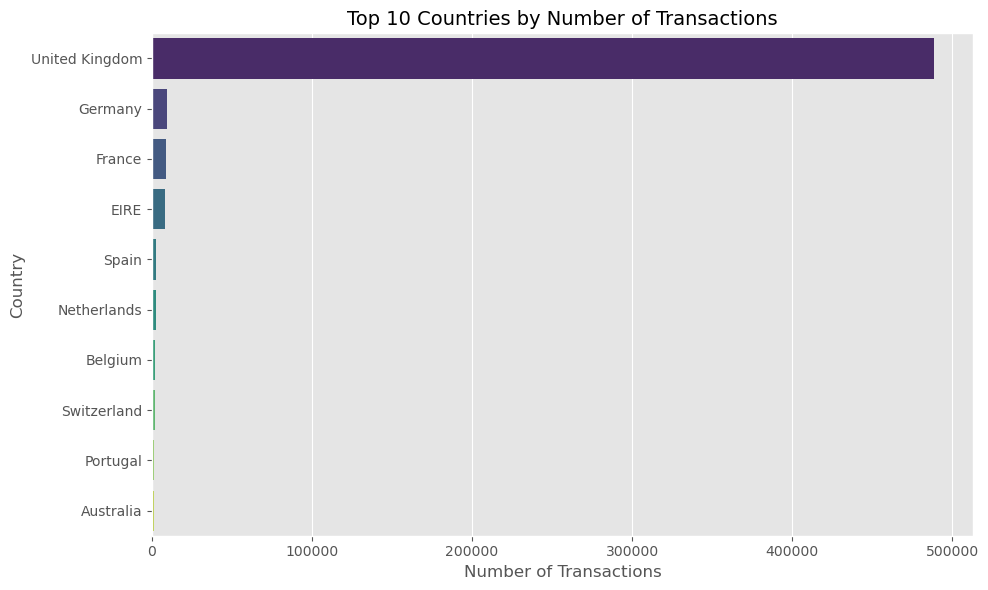

In [21]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Number of Transactions', fontsize=14)
plt.xlabel('Number of Transactions')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [22]:
# Group data by Year and Month, then sum Sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

In [24]:
monthly_sales['Month_Year'] = pd.to_datetime(
    monthly_sales['Month'] + ' ' + monthly_sales['Year'].astype(str),
    format='%B %Y'  # e.g., December 2010
)

Monthly Revenue Trend

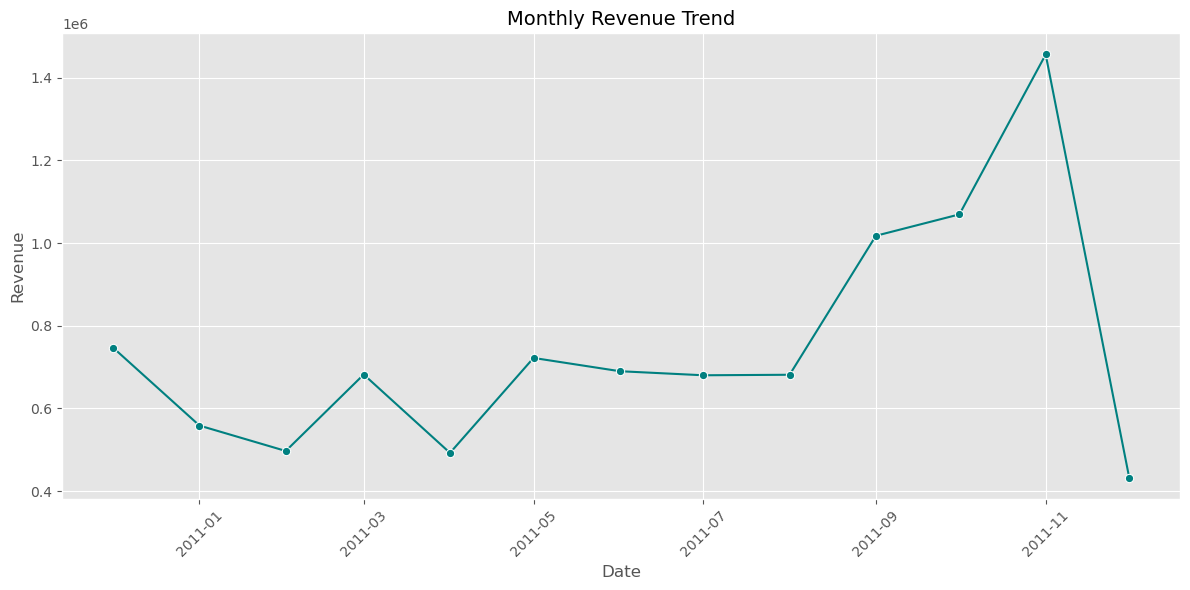

In [25]:
# Plot monthly revenue trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month_Year', y='Sales', data=monthly_sales, marker='o', color='teal')
plt.title('Monthly Revenue Trend', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Best-Selling Products by Revenue

C:\Users\rajat\AppData\Local\Temp\ipykernel_10852\3384519321.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='magma')


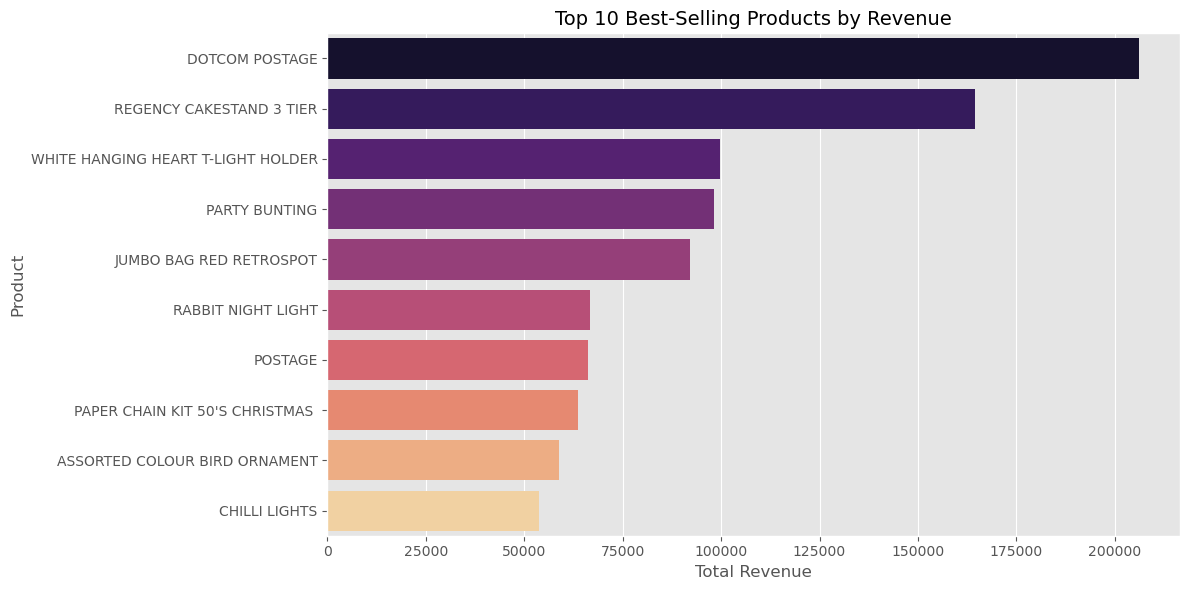

In [26]:
# Group by product description and sum the sales
top_products = df.groupby('Description')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Best-Selling Products by Revenue', fontsize=14)
plt.xlabel('Total Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

Monthly Sales Trend

C:\Users\rajat\AppData\Local\Temp\ipykernel_10852\1050255681.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette='coolwarm')


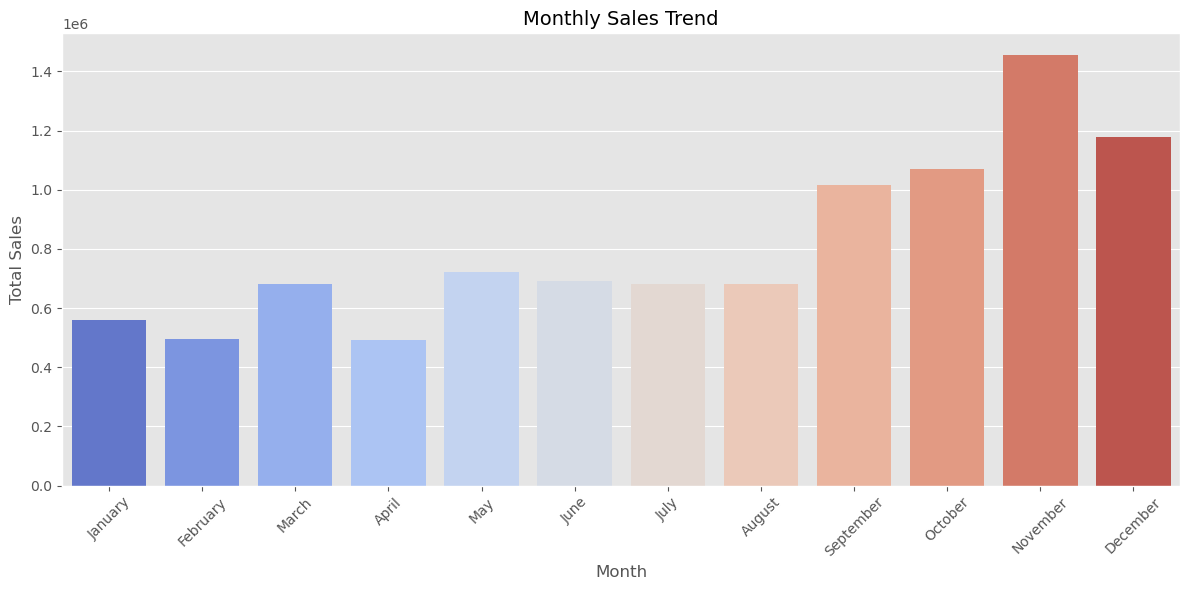

In [27]:
# Group data by month and aggregate sales
monthly_trend = df.groupby('Month')['Sales'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plot monthly sales
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_trend.index, y=monthly_trend.values, palette='coolwarm')
plt.title('Monthly Sales Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Customers by Total Spend

C:\Users\rajat\AppData\Local\Temp\ipykernel_10852\3873398582.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette='Blues_d')


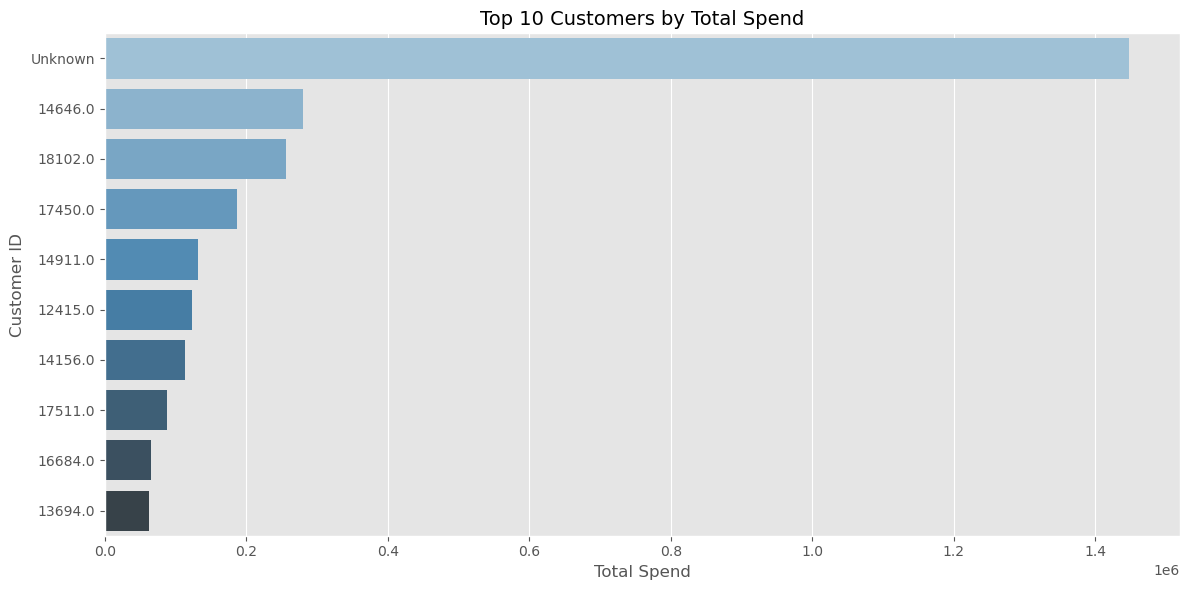

In [28]:
# Group by CustomerID and sum sales
top_customers = df.groupby('CustomerID')['Sales'].sum().sort_values(ascending=False).head(10)

# Plot top customers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.values, y=top_customers.index.astype(str), palette='Blues_d')
plt.title('Top 10 Customers by Total Spend', fontsize=14)
plt.xlabel('Total Spend')
plt.ylabel('Customer ID')
plt.tight_layout()
plt.show()